In [302]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
data_export = pd.read_excel('dataset/Feedback_Lat_2020.xlsx')

In [304]:
data_pelatihan.head(2)

,Nama Pelatihan,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,...,UBPP Akom,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score
0,Social Media Ads & Analytic,80114181,LAT,NaN,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CISM,80114269,LAT,Virtual Classroom,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Public,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [305]:
data_pelatihan.shape

(1303, 29)

In [306]:
data_pelatihan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1579
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Nama Pelatihan                     1303 non-null   object 
 1   Objid Pelatihan                    1303 non-null   int64  
 2   Category                           1303 non-null   object 
 3   Tipe                               712 non-null    object 
 4   Lokasi Pelatihan                   1245 non-null   object 
 5   Provider                           1261 non-null   object 
 6   Academy Event                      1260 non-null   object 
 7   Location                           1270 non-null   object 
 8   Provider Category                  1060 non-null   object 
 9   Event Type                         1290 non-null   object 
 10  Status                             1290 non-null   object 
 11  Tgl Mulai                          1303 non-null   objec

In [307]:
data_pelatihan.describe()

,Objid Pelatihan,JML Peserta,JML Confirmed,JML Peserta Hadir,JML UBPP Inst,JML UBPP Delivery,UBPP Inst,UBPP Akom,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score
count,1.303000e+03,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1261.000000,1303.000000,1303.000000,1303.0,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,8.172231e+07,39.025326,22.981581,28.485802,11.248657,15.635457,50.801642,33.120215,62.152947,0.0,63.565840,32.964827,63.740867,47.769210,61.430184,63.908573,63.433883
std,3.652143e+06,102.297344,70.368481,67.033256,22.308262,30.155942,40.631490,40.011366,39.712777,0.0,40.238506,39.955990,40.400794,40.119253,39.331669,40.527948,40.207933
min,8.011078e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000
25%,8.011263e+07,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.011326e+07,15.000000,8.000000,12.000000,4.000000,6.000000,75.390000,0.000000,84.000000,0.0,86.310000,0.000000,86.880000,58.330000,83.080000,86.940000,86.160000
75%,8.011395e+07,32.000000,24.000000,28.000000,16.000000,20.000000,85.420000,76.180000,90.000000,0.0,90.725000,76.935000,91.070000,80.000000,89.620000,91.050000,90.670000
max,9.000456e+07,1576.000000,1209.000000,790.000000,336.000000,343.000000,100.000000,100.000000,100.000000,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [308]:
cleanCS = data_pelatihan[['Customer Satisfaction']]

In [309]:
data_CS = cleanCS.loc[~(cleanCS==0).all(axis=1)]

In [310]:
data_CS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 7 to 1564
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  935 non-null    float64
dtypes: float64(1)
memory usage: 14.6 KB


In [311]:
cleanMat = data_pelatihan[['UBPP Materi']]

In [312]:
data_Mat = cleanMat.loc[~(cleanMat==0).all(axis=1)]

In [313]:
data_Mat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 7 to 1564
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UBPP Materi  935 non-null    float64
dtypes: float64(1)
memory usage: 14.6 KB


# Measure of Central Tendency

### Mean

In [314]:
meanCS= data_CS.mean()
print(meanCS)

Customer Satisfaction    85.608053
dtype: float64


In [315]:
meanMat = data_Mat.mean()
print(meanMat)

UBPP Materi    88.828182
dtype: float64


Rata-rata kepuasan Customer Telkom Corporate Univeristy selama 2020 adalah 85.608053
sedangkan skor rata-rata kepuasan umpan balik materi pelatihan sedikit lebih tinggi yaitu 88.828182

### Median

In [316]:
data_CS.median()

Customer Satisfaction    86.86
dtype: float64

In [317]:
data_Mat.median()

UBPP Materi    89.42
dtype: float64

Median kepuasan Customer Telkom Corporate Univeristy selama 2020 adalah 86.86
sedangkan skor median kepuasan umpan balik materi pelatihan sedikit lebih tinggi yaitu 89.42

## Modus

In [318]:
data_C = data_pelatihan[['JML Peserta']]

In [319]:
data_C.head(2)

,JML Peserta
0,28
1,4


In [320]:
modus_pelatihan = data_C['JML Peserta'].mode()
print(modus_pelatihan)

0    1
dtype: int64


Mayoritas pelatihan di Telkom Corporate University ternyata adalah pelatihan individual yang hanya diikuti oleh 1 orang saja

# Measure of spread

# Range

In [321]:
range_CS = np.ptp(cleanCS['Customer Satisfaction'])
print(range_CS)

100.0


In [322]:
range_Mat = np.ptp(cleanMat['UBPP Materi'])
print(range_Mat)

100.0


## Variance

In [323]:
var_CS = np.var(data_CS['Customer Satisfaction'], ddof=1)
print(var_CS)

84.46064609992101


In [324]:
var_Mat = np.var(data_Mat['UBPP Materi'], ddof=1)
print(var_Mat)

44.481025598598265


Variance Customer Satisfaction adalah 84.46064609992101 sedangkan UBPP Materi lebih rendah variansinya yaitu hanya 44.481025598598265

## Standar Deviation

In [325]:
std_CS = np.std(data_CS['Customer Satisfaction'], ddof=1)
print(std_CS)

9.190247336166802


In [326]:
std_Mat = np.std(data_Mat['UBPP Materi'], ddof=1)
print(std_Mat)

6.669409688915374


Standar Deviation Customer Satisfaction adalah 9.190247336166802 sedangkan UBPP Materi 6.669409688915374

## Probability Distribution

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Distribution')]

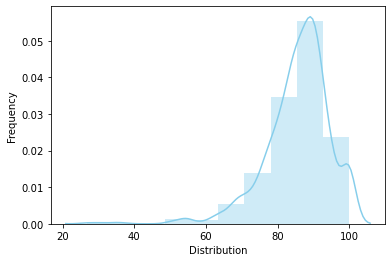

In [327]:
ax = sns.distplot(data_CS,
                 bins=10,
                 kde=True,
                 color='skyblue',
                 hist_kws={'linewidth':15})

ax.set(xlabel='Distribution',
      ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Distribution')]

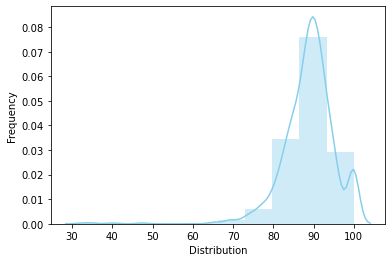

In [328]:
ay = sns.distplot(data_Mat,
                 bins=10,
                 kde=True,
                 color='skyblue',
                 hist_kws={'linewidth':15})

ay.set(xlabel='Distribution',
      ylabel='Frequency')

Dari visualisasi data terlihat ternyata baik Customer Satisfaction dan Umpan Balik Peserta Pelatihan (UBPP) Materi keduanya merupakan negative skewness dengan ekor kiri lebih panjang. Hal ini menandakan bahwa mayoritas score Customer Satisfaction dan UBPP Materi memiliki nilai tinggi (lebih dari 80)

## Confidence Intervals

In [329]:
# Confidence Intervals Customer Satisfaction

n = data_CS['Customer Satisfaction'].count()
z = 1.96

SE = std_CS / np.sqrt(n)
lcb = meanCS - z* SE #lower
ucb = meanCS + z* SE #Upper
print ('Lower Limit of Cust Satisfaction : ', lcb)
print ('Upper Limit of Cust Satisfaction : ', ucb)

Lower Limit of Cust Satisfaction :  Customer Satisfaction    85.018969
dtype: float64
Upper Limit of Cust Satisfaction :  Customer Satisfaction    86.197138
dtype: float64


In [330]:
# Confidence Intervals UBPP Materi

n2 = data_Mat['UBPP Materi'].count()
z = 1.96

SE2 = std_Mat / np.sqrt(n2)
lcb = meanMat - z* SE2 #lower
ucb = meanMat + z* SE2 #Upper
print ('Lower Limit of UBPP Materi : ', lcb)
print ('Upper Limit of UBPP Materi : ', ucb)

Lower Limit of UBPP Materi :  UBPP Materi    88.40068
dtype: float64
Upper Limit of UBPP Materi :  UBPP Materi    89.255683
dtype: float64


CI Customer Satisfaction antara 85.018969 sampai 86.197138
sedangkan
CI UBPP Materi antara antara 88.40068 sampai 88.40068

## Hypothesis Testing

Sekarang kita akan menguji apakah kepuasan customer (customer satisfaction) memiliki hubungan monotonic dengan kualitas materi (UBPP Materi) menggunakan beberapa cara sebagai berikut :

H0 : Cust satisfaction dan UBPP materi masing-masing bersifat independen
H1 : Terdapat dependency antara Customer Satisfction dan UBPP Materi

In [331]:
#Spearman's Rank Correlation

from scipy.stats import spearmanr
stat, p = spearmanr('data_CS', 'data_Mat')
print('stat=%3f, p=%.3f' % (stat, p))
if p> 0.05:
    print('Probably Independent')
    
else:
    print('Probably dependent')

stat=nan, p=nan
Probably dependent


In [332]:
#Kendall's Rank Correlation

from scipy.stats import kendalltau
stat, p = spearmanr('data_CS', 'data_Mat')
print('stat=%3f, p=%.3f' % (stat, p))
if p> 0.05:
    print('Probably Independent')
    
else:
    print('Probably dependent')

stat=nan, p=nan
Probably dependent


Dari pengecekan Spearman dan Kendall terdapat kemungkinan dependency antara data kepuasan customer dan UBPP materi.